Alex Albaugh.  Wayne State.  CHE 5995/7507.  Lecture 19.  Winter 2026.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# **Logistic Regression**

Logistic regression is a classification tool.  We use it to model the probability of each category and then take the category with the highest predicted probability as our final classification.  Here we'll classify American football games for a chosen team into predicted wins or losses based on the number of yards gained.  The data set contains all of the NFL games played between 2008 and 2023.  Each game includes the names of the two teams, the score, the number of yards gained by either team, the number of turnovers from each team, and some other statistics.

We'll first pick a team and visualize their wins/losses against the number of yards they gained in each game.

In [11]:
#select a team of interest
team = 'Detroit Lions'

In [12]:
#read file of all NFL games from 2008-2023
df = pd.read_csv('https://raw.githubusercontent.com/albaugh/CHE7507/refs/heads/main/Lecture19/NFL_games_2008-2023.csv')

df.head()

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,PtsW,PtsL,YdsW,TOW,YdsL,TOL
0,1,Thu,2008-09-04,7:08PM,New York Giants,NaN,Washington Redskins,boxscore,16,7,354,1,209,0
1,1,Sun,2008-09-07,1:02PM,Buffalo Bills,NaN,Seattle Seahawks,boxscore,34,10,338,0,252,2
2,1,Sun,2008-09-07,1:02PM,Pittsburgh Steelers,NaN,Houston Texans,boxscore,38,17,305,1,234,3
3,1,Sun,2008-09-07,1:02PM,New England Patriots,NaN,Kansas City Chiefs,boxscore,17,10,338,2,284,1
4,1,Sun,2008-09-07,1:02PM,New York Jets,@,Miami Dolphins,boxscore,20,14,293,1,277,1


Detroit Lions W/L record:  106 - 159


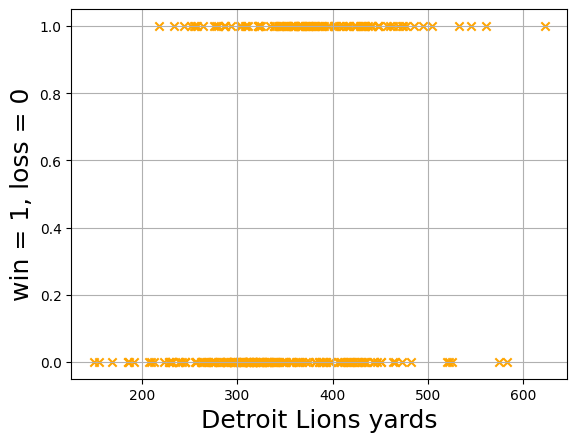

In [13]:
#get a list of the winning and losing teams for each game along with scores, yards, and turnovers for each
winning_teams = df['Winner/tie']
losing_teams = df['Loser/tie']
winning_score = df['PtsW']
losing_score = df['PtsL']
winning_yards = df['YdsW']
losing_yards = df['YdsL']
winning_tos = df['TOW']
losing_tos = df['TOL']

#gather the yards and turnovers for and against the team of interest
#create a one-hot vector 'win' where 1 is a win for the team and 0 is a loss
team_yards = np.array([])
opp_yards = np.array([])
team_tos = np.array([])
opp_tos = np.array([])
win = np.array([])
for wt,lt,wy,ly,wto,lto in zip(winning_teams, losing_teams, winning_yards, losing_yards, winning_tos, losing_tos):
  if wt == team:
    team_yards = np.append(team_yards, wy)
    team_tos = np.append(team_tos, wto)
    opp_yards = np.append(opp_yards, ly)
    opp_tos = np.append(opp_tos, lto)
    win = np.append(win, 1)
  elif lt == team:
    team_yards = np.append(team_yards, ly)
    team_tos = np.append(team_tos, lto)
    opp_yards = np.append(opp_yards, wy)
    opp_tos = np.append(opp_tos, wto)
    win = np.append(win, 0)

#report the W/L record for the chosen team
print(team, 'W/L record: ', int(np.sum(win)),'-',int(len(win)-np.sum(win)))

#plot the wins (1) and losses (0) of the team vs. the number of yards that team gained
fig,ax = plt.subplots()
ax.scatter(team_yards,win,color='orange',marker='x')
ax.set_xlabel(team+' yards',fontsize=18)
ax.set_ylabel('win = 1, loss = 0',fontsize=18)
ax.grid()
plt.show()

We'll now use logistic regression to git these wins/losses (1 or 0) against the number of yards.  We can use <code>sklearn</code>'s <code>LogisticRegression</code> function to do this.
Note that for <code>sklearn</code> feature inputs, it always expects a 2-D array even for a single 1-D feature.  So we use the <code>.reshape(-1,)</code> bit to explicitly force the data to have a 2-D shape.

In [14]:
model = sklearn.linear_model.LogisticRegression(max_iter=1000)
model.fit(team_yards.reshape(-1,1), win)

LogisticRegression(max_iter=1000)

Let's visualize our model and it's predictions.  For the range of yards that we see in this training data, we will make predictions with the logistic regression model and plot them with the training data.  We can determine both the fitted probability with <code>predict_proba</code> and the final predictions with <code>predict</code>.  Based on our predicted probabilities, a probability over 0.5 is a predicted win ('1') and a probability below 0.5 is a predicted loss ('0').

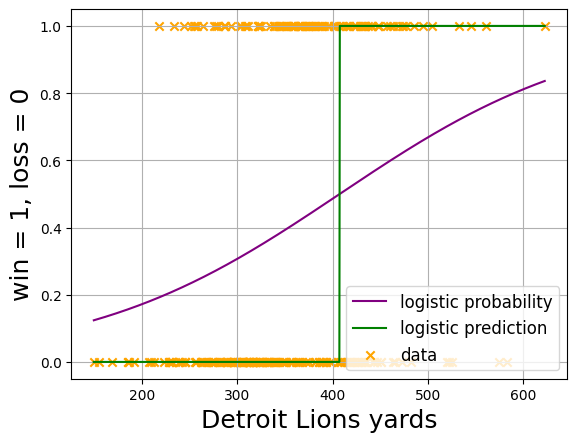

Training accuracy:  60.0 %


In [15]:
yards_vis = np.linspace(np.min(team_yards),np.max(team_yards),1000) #array of yard values to make predictions on
pred_prob = model.predict_proba(yards_vis.reshape(-1,1))[:,1] #logistic fit over the visualization range- probability of class '1'
pred = model.predict(yards_vis.reshape(-1,1)) #predictions over the visualization range

#plot the model probabilities and predictions
fig,ax = plt.subplots()
ax.plot(yards_vis,pred_prob,color='purple',label='logistic probability')
ax.plot(yards_vis,pred,color='green',label='logistic prediction')

#plot the wins (1) and losses (0) of the team vs. the number of yards that team gained
ax.scatter(team_yards,win,color='orange',marker='x',label='data')
ax.set_xlabel(team+' yards',fontsize=18)
ax.set_ylabel('win = 1, loss = 0',fontsize=18)
ax.grid()
ax.legend(fontsize=12)
plt.show()

#let's also check our model's training accuracy
training_predictions = model.predict(win.reshape(-1,1))
train_accuracy = sklearn.metrics.accuracy_score(win, training_predictions)
print('Training accuracy: ',100.0*np.round(train_accuracy,decimals=4),'%')

We can also do logistic regression with more than a single feature.  Now let's try to predict our team's wins and losses based on the yards that they gained (a measure of offense) and the yards that they gave up (a measure of defense).

In [16]:
X_train = np.column_stack((team_yards,opp_yards)) #feature 1 is our yards gained, feature 2 is our yards lost
model = sklearn.linear_model.LogisticRegression(max_iter=1000)
model.fit(X_train, win)

LogisticRegression(max_iter=1000)

Let's visualize.  We have two features and we're predicting a probability, so our graph will now be 3-D.

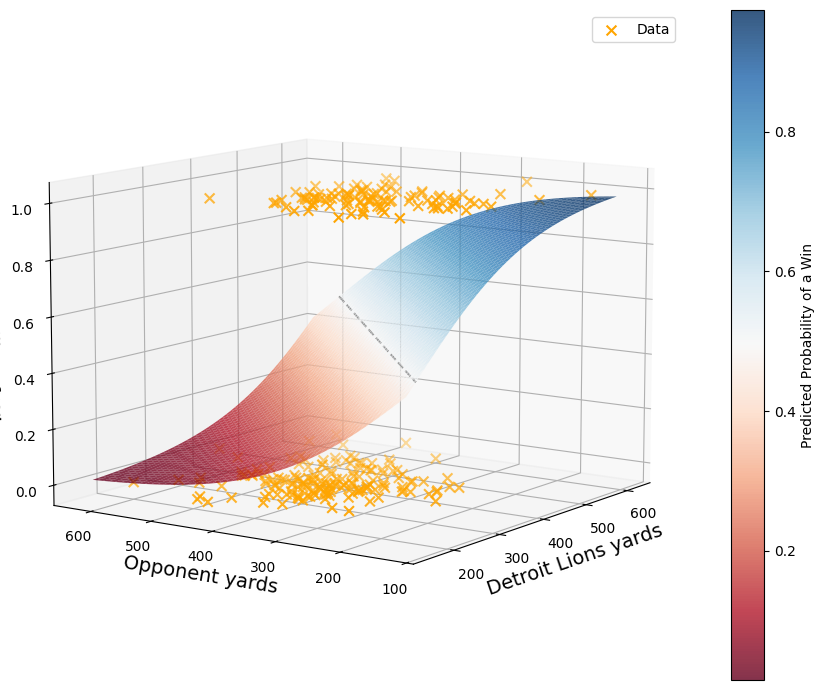

Training accuracy:  65.66 %


In [17]:
#generate grid of gained and lost yards
x_min = np.min(X_train[:, 0])
x_max = np.max(X_train[:, 0])
y_min = np.min(X_train[:, 1])
y_max = np.max(X_train[:, 1])

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

#predict probabilities on the grid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

#set up 3-D plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

#draw the predicted probabilities as a 3D surface plot
surface = ax.plot_surface(xx, yy, Z, cmap='RdBu', alpha=0.8, edgecolor='none')
fig.colorbar(surface, label='Predicted Probability of a Win')

#plot the actual wins (1) and losses (0) as data points
ax.scatter(X_train[:, 0], X_train[:, 1], win, color='orange', marker='x', s=50, label='Data')

#plot the decision boundary (probability = 0.5)
ax.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', offset=0.5)

#plot set up
ax.set_xlabel(f'{team} yards', fontsize=14)
ax.set_ylabel('Opponent yards', fontsize=14)
ax.set_zlabel('Probability of Win', fontsize=14)
ax.view_init(elev=10, azim=215)
ax.legend()
plt.tight_layout()
plt.show()

#let's also check our model's training accuracy
training_predictions = model.predict(X_train)
train_accuracy = sklearn.metrics.accuracy_score(win, training_predictions)
print('Training accuracy: ',100.0*np.round(train_accuracy,decimals=4),'%')

Just for fun, let's also add in some more features- the number of turnovers our team gave up and the number of turnovers our team recovered.  We won't be able to visualize this new 4-D feature space, but we can make predictions and see how well our model performs.

In [18]:
X_train = np.column_stack((team_yards, opp_yards, team_tos, opp_tos))
model = sklearn.linear_model.LogisticRegression(max_iter=1000)
model.fit(X_train, win)

training_predictions = model.predict(X_train)
train_accuracy = sklearn.metrics.accuracy_score(win, training_predictions)
print('Training accuracy: ',100.0*np.round(train_accuracy,decimals=4),'%')

Training accuracy:  78.11 %
